In [ ]:
include("SpinGlassCore.jl")
using .SpinGlassCore
include("../../logger/logger.jl")
using .MyLogger
using Optimisers, Logging, LinearAlgebra, Distributions, Statistics, StatsBase, Random, ProgressMeter
using CairoMakie

# seed = 42
# Random.seed!(seed)

init_logger(dir="../../logs", level=:Info)
println(names(SpinGlassCore))

[:SpinGlassCore, :calc_acceptance_and_rtt, :calc_energy, :initial_state, :metropolis_sampler, :uniform_acceptance_grad_sm]


In [ ]:
N = 20
M = 20

@info """
Hyperparameters of ±J model:
--------------------
system size: $(N*N),
the number of replica: $M,
MCS: $mcSteps
"""
println("Set hyperparameters.")

Set hyperparameters.


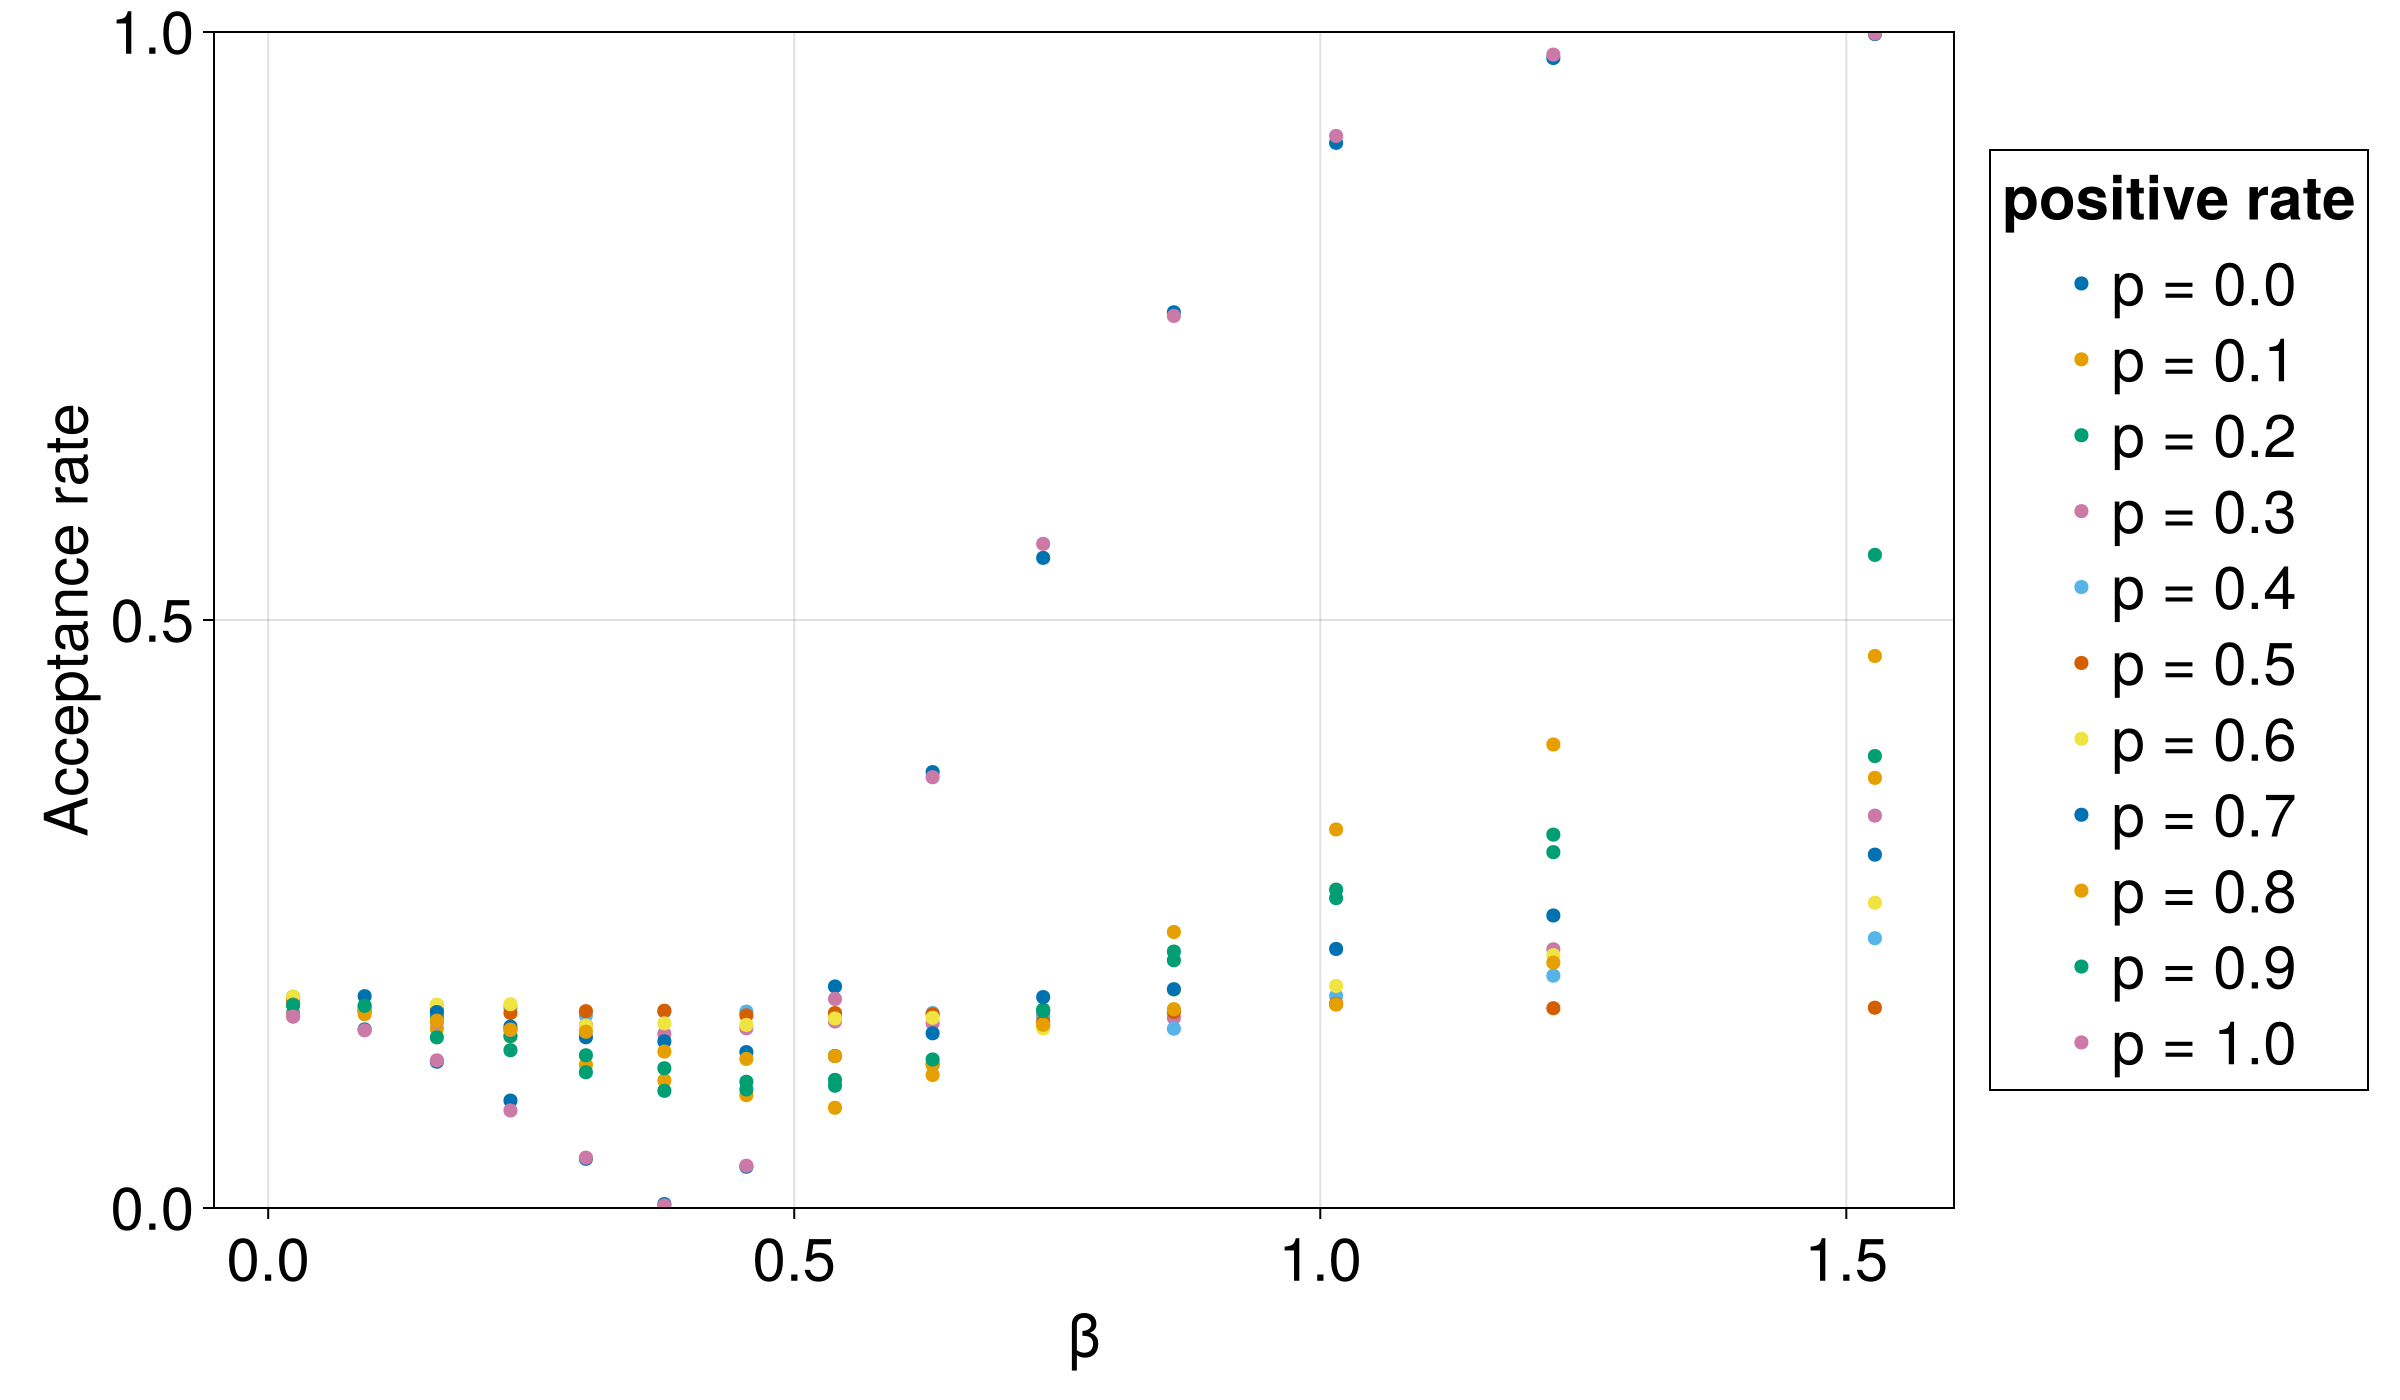

CairoMakie.Screen{IMAGE}


In [6]:
optimal_β_ladder = [0.02366366521145683, 0.09165865742510572, 0.16032938456822032, 0.2302735887583349, 0.30198538009727843, 0.3765678575208895, 0.4545109701380863, 0.5387418590933178, 0.6315456728110064, 0.7366229519001501, 0.860863079634594, 1.0150615059529287, 1.221544260033799, 1.5271857646178788, 2.0730517284257046] # Gaussian model

fig1 = Figure(size=(1200, 700), fontsize = 30)
ax1 = fig1[1, 1] = Axis(fig1, xlabel="β", ylabel="Acceptance rate")
ylims!(ax1, 0, 1)
for i in 0:10
    p = i / 10.0
    signs_h = 2 .* rand(Bernoulli(p), N, N) .- 1
    signs_v = 2 .* rand(Bernoulli(p), N, N) .- 1
    Jh = Float64.(signs_h)
    Jv = Float64.(signs_v)
    exchange_prob_means, _ = SpinGlassCore.calc_acceptance_and_rtt(N, optimal_β_ladder, Jh, Jv)

    @info "p=$p: $exchange_prob_means"
    scatter!(ax1, optimal_β_ladder[1:(end-1)], exchange_prob_means, markersize=10, label="p = $p")
end    
# axislegend()
Legend(fig1[1, 2], ax1, "positive rate")
display(fig1)